# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [85]:
# Resolver acá
import os
import pandas as pd
import matplotlib as plt

#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')
#os.chdir('c:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP2/TP2')
os.chdir('/Users/trinimoran/Documents/Ciencia de Datos/TP2')

In [87]:
airbnb = pd.read_csv('Base Airbnb NY.csv')
airbnb #primero miramos la base en general

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48900,19454344,Perfect ap in Manhattan! Walking to Central Park!,11670284,Val,Manhattan,Upper East Side,40.76811,-73.95194,Entire home/apt,150.0,3,10,2019-05-02,0.54,2,89
48901,36224876,Upper East Side Apt By The Water,46232598,Caitlin,Manhattan,Upper East Side,40.77001,-73.94915,Entire home/apt,150.0,1,1,2019-07-01,1.00,1,130
48902,21869051,Comfy Apt in NYC Brownstone,97243693,Joyce,Manhattan,Murray Hill,40.74812,-73.97663,Entire home/apt,150.0,3,57,2019-07-01,3.07,2,49
48903,3004563,The spot,15303460,Emma,Brooklyn,Prospect-Lefferts Gardens,40.65595,-73.95412,Private room,50.0,7,1,2019-06-08,0.94,1,125


In [123]:
offer_count = airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_group')
print(offer_count)

  neighbourhood_group  offer_group
0               Bronx          910
1            Brooklyn        12243
2           Manhattan        13554
3              Queens         4292
4       Staten Island          331


In [89]:
#LIMPIEZA

#limpieza de variables (columnas) que no nos interesan
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)

#elimino duplicados
airbnb = airbnb.drop_duplicates(subset = 'id', keep = 'first')

In [58]:
#este paquete nos va a ayudar a identificar la missing data

# !pip install missingno  # si no esta instalado 
import missingno as msno

<Axes: >

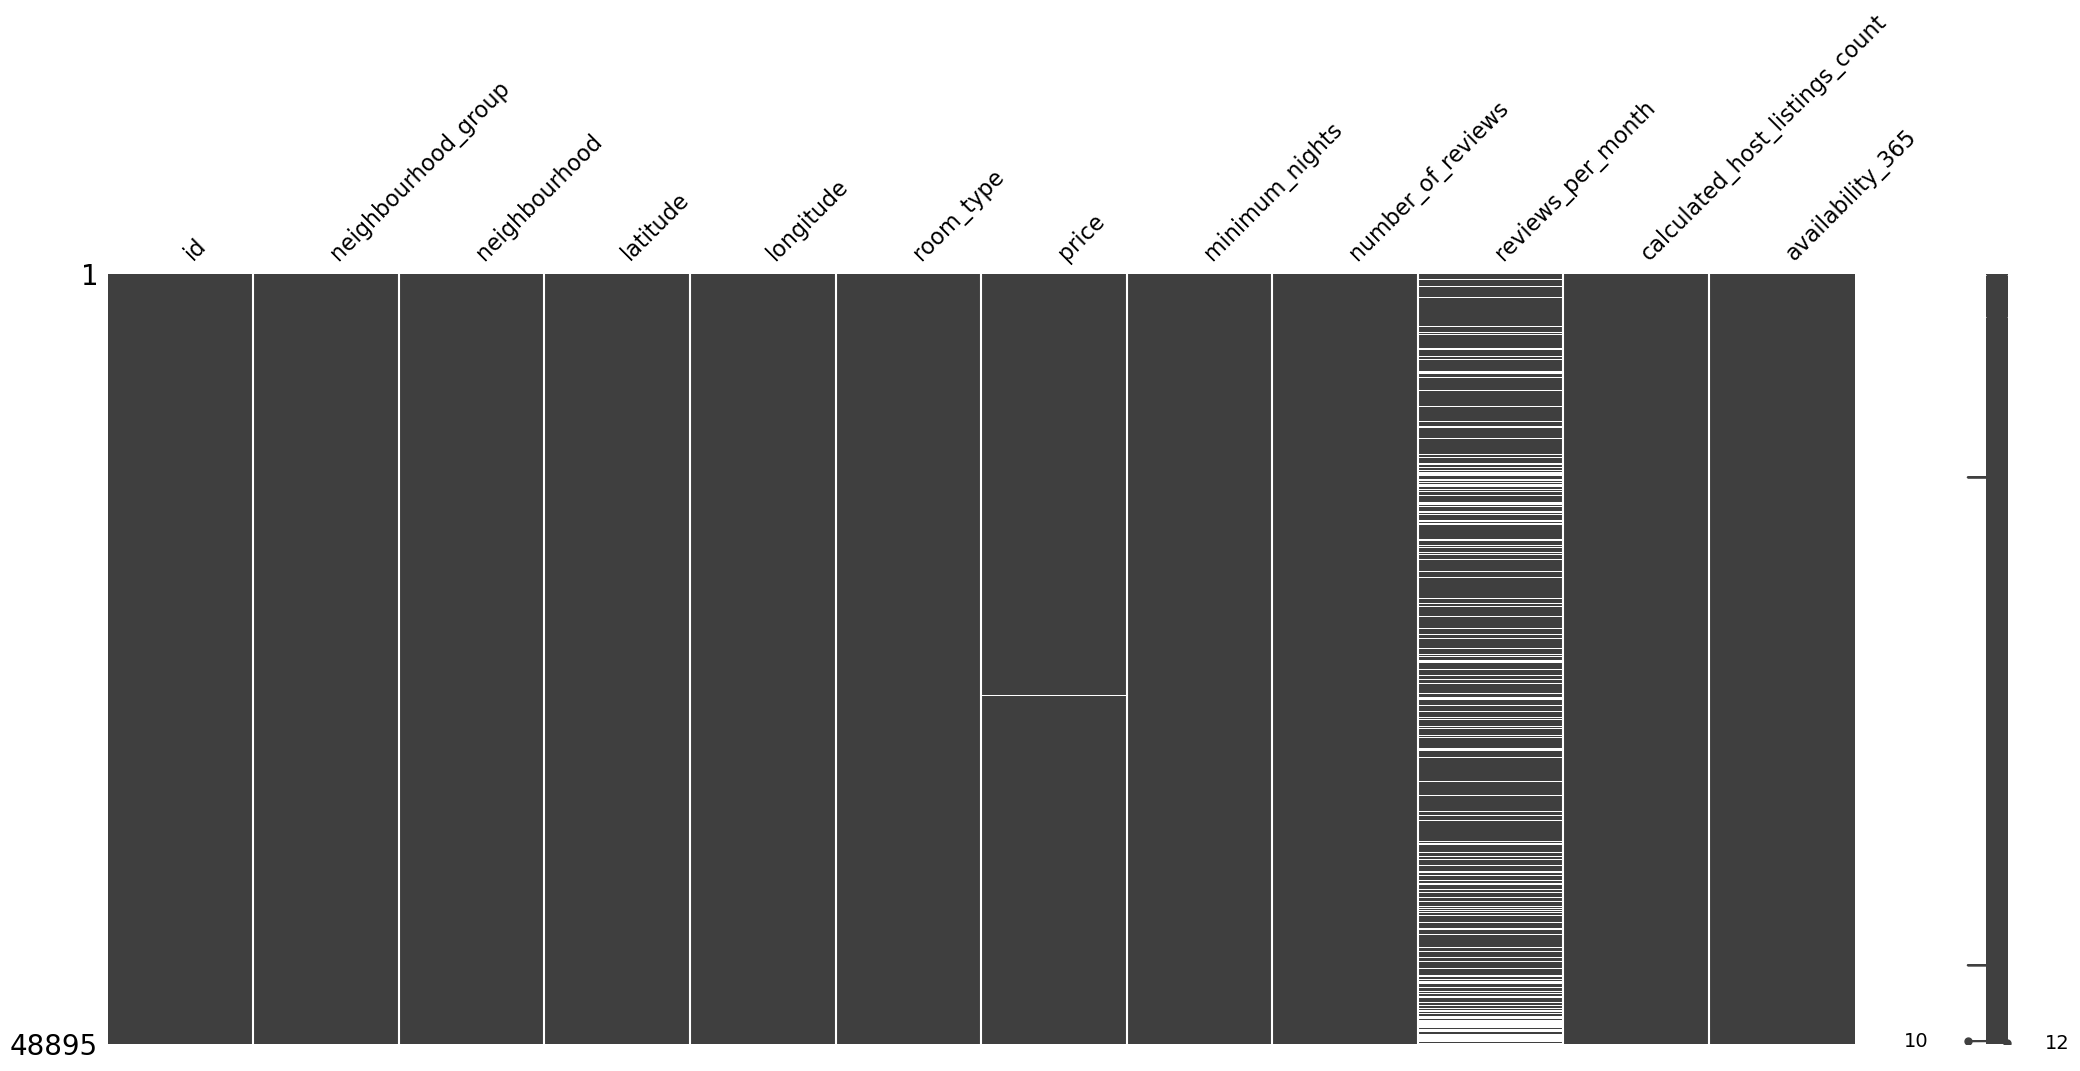

In [60]:
# para ver la matriz de valores faltantes
msno.matrix(airbnb)

In [62]:
# MISSING VALUES
# cuantos valores faltantes hay en la columna 'precio'?
na_precio = airbnb['price'].isnull().sum()
print(na_precio) #son 15, no vale la pena imputar

15


<Axes: >

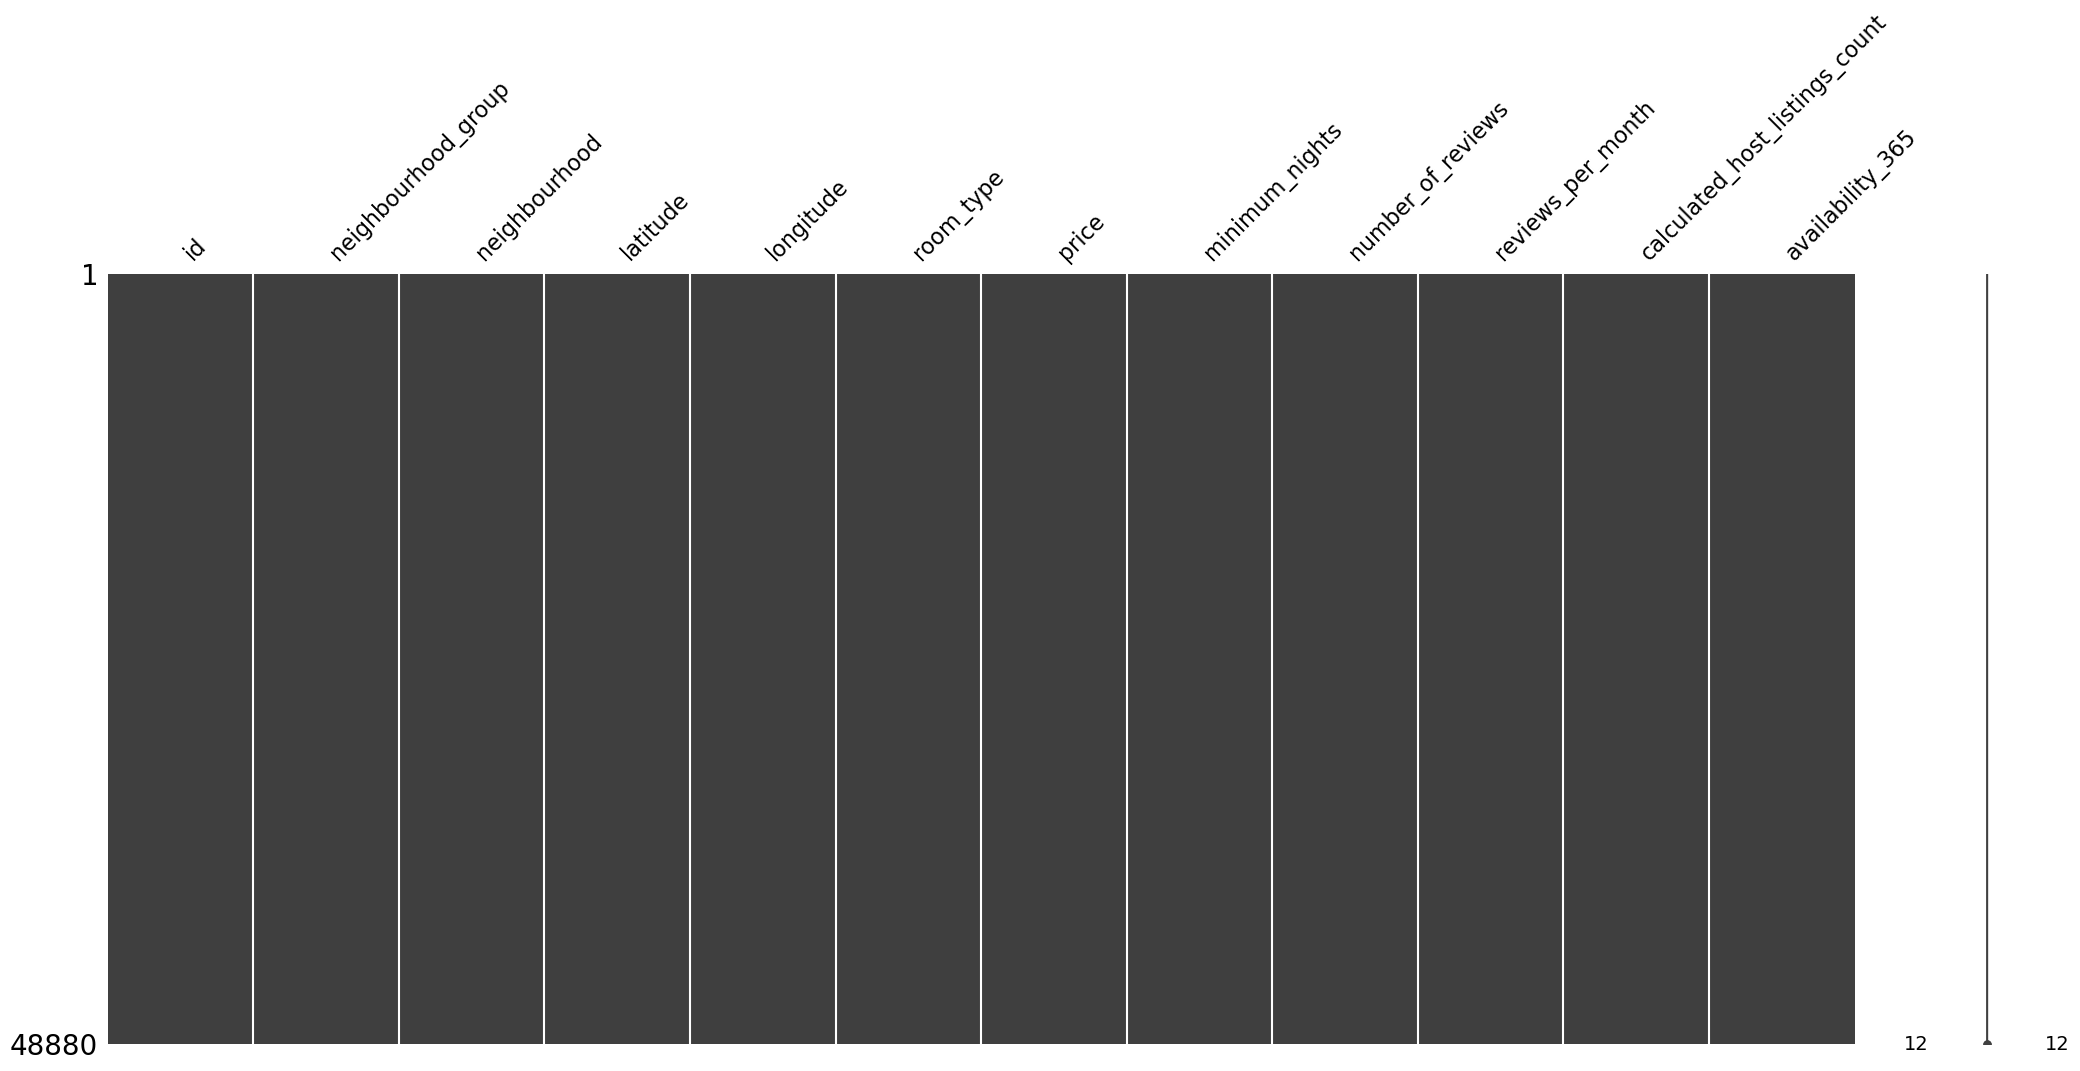

In [91]:
# como los NaN que aparecian correspondian con que en el number_of_reviews era 0, significa que hay 0 reviews_per_months. Por lo tanto, decidimos reemplazar esos NaN por 0.
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)
# eliminamos los na de la columna precio
airbnb = airbnb.dropna(subset=['price'])

# chequear si quedan valores faltantes
msno.matrix(airbnb)

In [93]:
# ultimos arreglos para segurarnos que los datos tengan sentido

#disponibilidad no puede ser neg
airbnb = airbnb[airbnb['availability_365'] > 0] 

#No tiene sentido que un departamento sea gratis
airbnb = airbnb[airbnb['price'] > 0]

#No tiene sentido que el min requerido de noches sea 0
airbnb = airbnb[airbnb['minimum_nights'] > 0]

# airbnb = airbnb[airbnb['number_of_reviews'] > 0] 
# airbnb = airbnb[airbnb['reviews_per_month'] > 0]

#No tiene sentido que el oferente tenga 0 propiedades si está en la base
airbnb = airbnb[airbnb['calculated_host_listings_count']> 0]

In [95]:
#como resultado, tenemos la siguiente base limpia
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

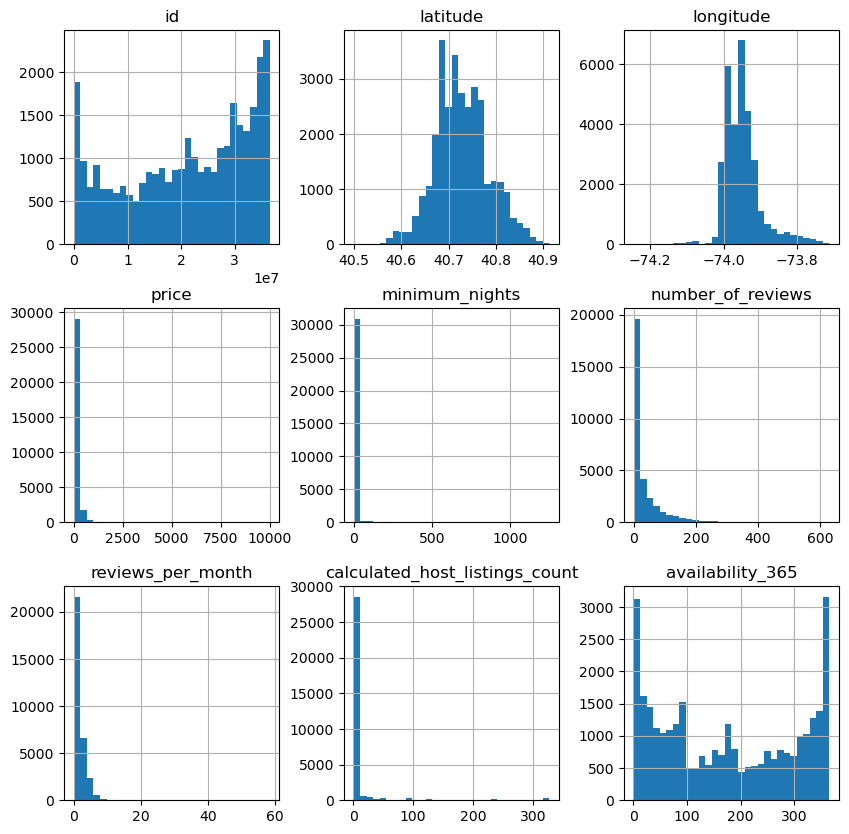

In [70]:
#visualicemos la distribucion de nuestras variables
airbnb.hist(figsize = (10,10), bins = 30)

In [97]:
import numpy as np
#transformamos las columnas necesarias a log
# Columnas a las que aplicar logaritmo
columnas_log = ['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']

#Aplicar logaritmo a las columnas seleccionadas
airbnb[columnas_log] = np.log(airbnb[columnas_log])
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.003946,0.000000,9,0.21,1.791759,5.899897
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,45,0.38,0.693147,5.872118
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,5.010635,1.098612,0,0.00,0.000000,5.899897
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,270,4.64,0.000000,5.267858
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,74,0.59,0.000000,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,4.248495,0.693147,0,0.00,0.693147,2.197225
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,3.688879,1.386294,0,0.00,0.693147,3.583519
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,4.744932,2.302585,0,0.00,0.000000,3.295837
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,4.007333,0.000000,0,0.00,1.791759,0.693147


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

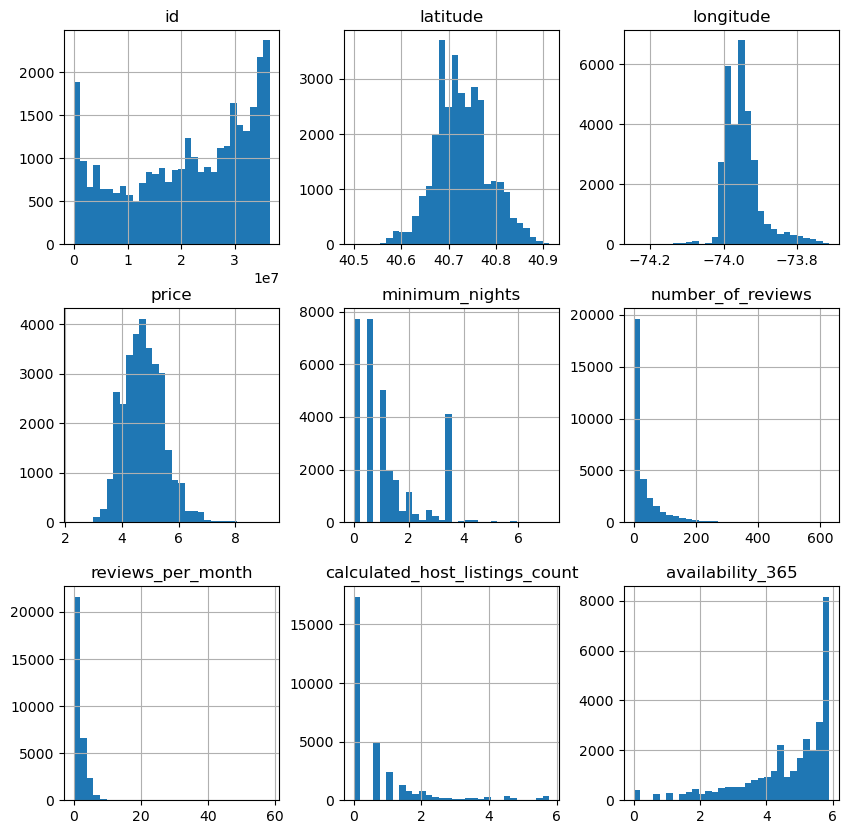

In [99]:
airbnb.hist(figsize = (10,10), bins = 30)

In [101]:
# outliers y valores que no tienen sentido
# ya tomamos una decision en cuanto a los negativos de availability y la fecha de de last review
numeric_columns = airbnb.select_dtypes(include=['float64', 'int64']).columns

#defino la funcion para eliminar outliers
def eliminar_outliers_iqr(df, columnas):
    df_clean = df.copy()  # Hacer una copia del DataFrame original
    for column in columnas:  # Iterar solo sobre las columnas especificadas
        # Calcular Q1 (percentil 25) y Q3 (percentil 75) para la columna
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar para mantener solo los valores dentro de los límites
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [103]:
# Llamar la función para eliminar los outliers
columnas = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
airbnb_clean = eliminar_outliers_iqr(airbnb, columnas)

# Mostrar el DataFrame sin outliers
airbnb_clean

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,45,0.38,0.693147,5.872118
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,5.010635,1.098612,0,0.00,0.000000,5.899897
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,270,4.64,0.000000,5.267858
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,74,0.59,0.000000,4.859812
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,4.369448,0.693147,430,3.47,0.000000,5.393628
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,4.828314,1.386294,0,0.00,0.000000,3.433987
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,4.248495,0.693147,0,0.00,0.693147,2.197225
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,3.688879,1.386294,0,0.00,0.693147,3.583519
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,4.744932,2.302585,0,0.00,0.000000,3.295837


 Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [105]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'room_type'
room_type_order = {
    'Shared room': 0,       # Menor valor
    'Private room': 1,      # Valor intermedio
    'Entire home/apt': 2    # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb_clean['room_type_num'] = airbnb_clean['room_type'].map(room_type_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb_clean[['room_type', 'room_type_num']])


             room_type  room_type_num
1      Entire home/apt              2
2         Private room              1
3      Entire home/apt              2
5      Entire home/apt              2
7         Private room              1
...                ...            ...
48888     Private room              1
48890     Private room              1
48891     Private room              1
48892  Entire home/apt              2
48894     Private room              1

[21680 rows x 2 columns]


In [107]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'neighbourhood_type'
neighbourhood_group_order = {
    'Staten Island': 0,       # Menor valor
    'Bronx': 1,      
    'Queens': 2,           # Valor intermedio
    'Brooklyn': 3,
    'Manhattan': 4       # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb_clean['neighbourhood_group_num'] = airbnb_clean['neighbourhood_group'].map(neighbourhood_group_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb_clean[['neighbourhood_group', 'neighbourhood_group_num']])

      neighbourhood_group  neighbourhood_group_num
1               Manhattan                        4
2               Manhattan                        4
3                Brooklyn                        3
5               Manhattan                        4
7               Manhattan                        4
...                   ...                      ...
48888           Manhattan                        4
48890            Brooklyn                        3
48891            Brooklyn                        3
48892           Manhattan                        4
48894           Manhattan                        4

[21680 rows x 2 columns]


In [109]:
#- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>
#agrupar por 'neighbourhood_group' y contar la cantidad de oferentes por cada grupo
offer_count = airbnb_clean.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Paso 2: Hacer un merge o join con el DataFrame original para añadir la columna 'offer_group'
airbnb_clean = airbnb_clean.merge(offer_count, on='neighbourhood_group', how='left')
print(offer_count)
airbnb_clean

  neighbourhood_group  offer_group
0               Bronx          514
1            Brooklyn         9931
2           Manhattan         9082
3              Queens         2152
4       Staten Island            1


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,offer_group
0,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,45,0.38,0.693147,5.872118,2,4,9082
1,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,5.010635,1.098612,0,0.00,0.000000,5.899897,1,4,9082
2,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,270,4.64,0.000000,5.267858,2,3,9931
3,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,74,0.59,0.000000,4.859812,2,4,9082
4,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,4.369448,0.693147,430,3.47,0.000000,5.393628,1,4,9082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,36484087,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,4.828314,1.386294,0,0.00,0.000000,3.433987,1,4,9082
21676,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,4.248495,0.693147,0,0.00,0.693147,2.197225,1,3,9931
21677,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,3.688879,1.386294,0,0.00,0.693147,3.583519,1,3,9931
21678,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,4.744932,2.302585,0,0.00,0.000000,3.295837,2,4,9082


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

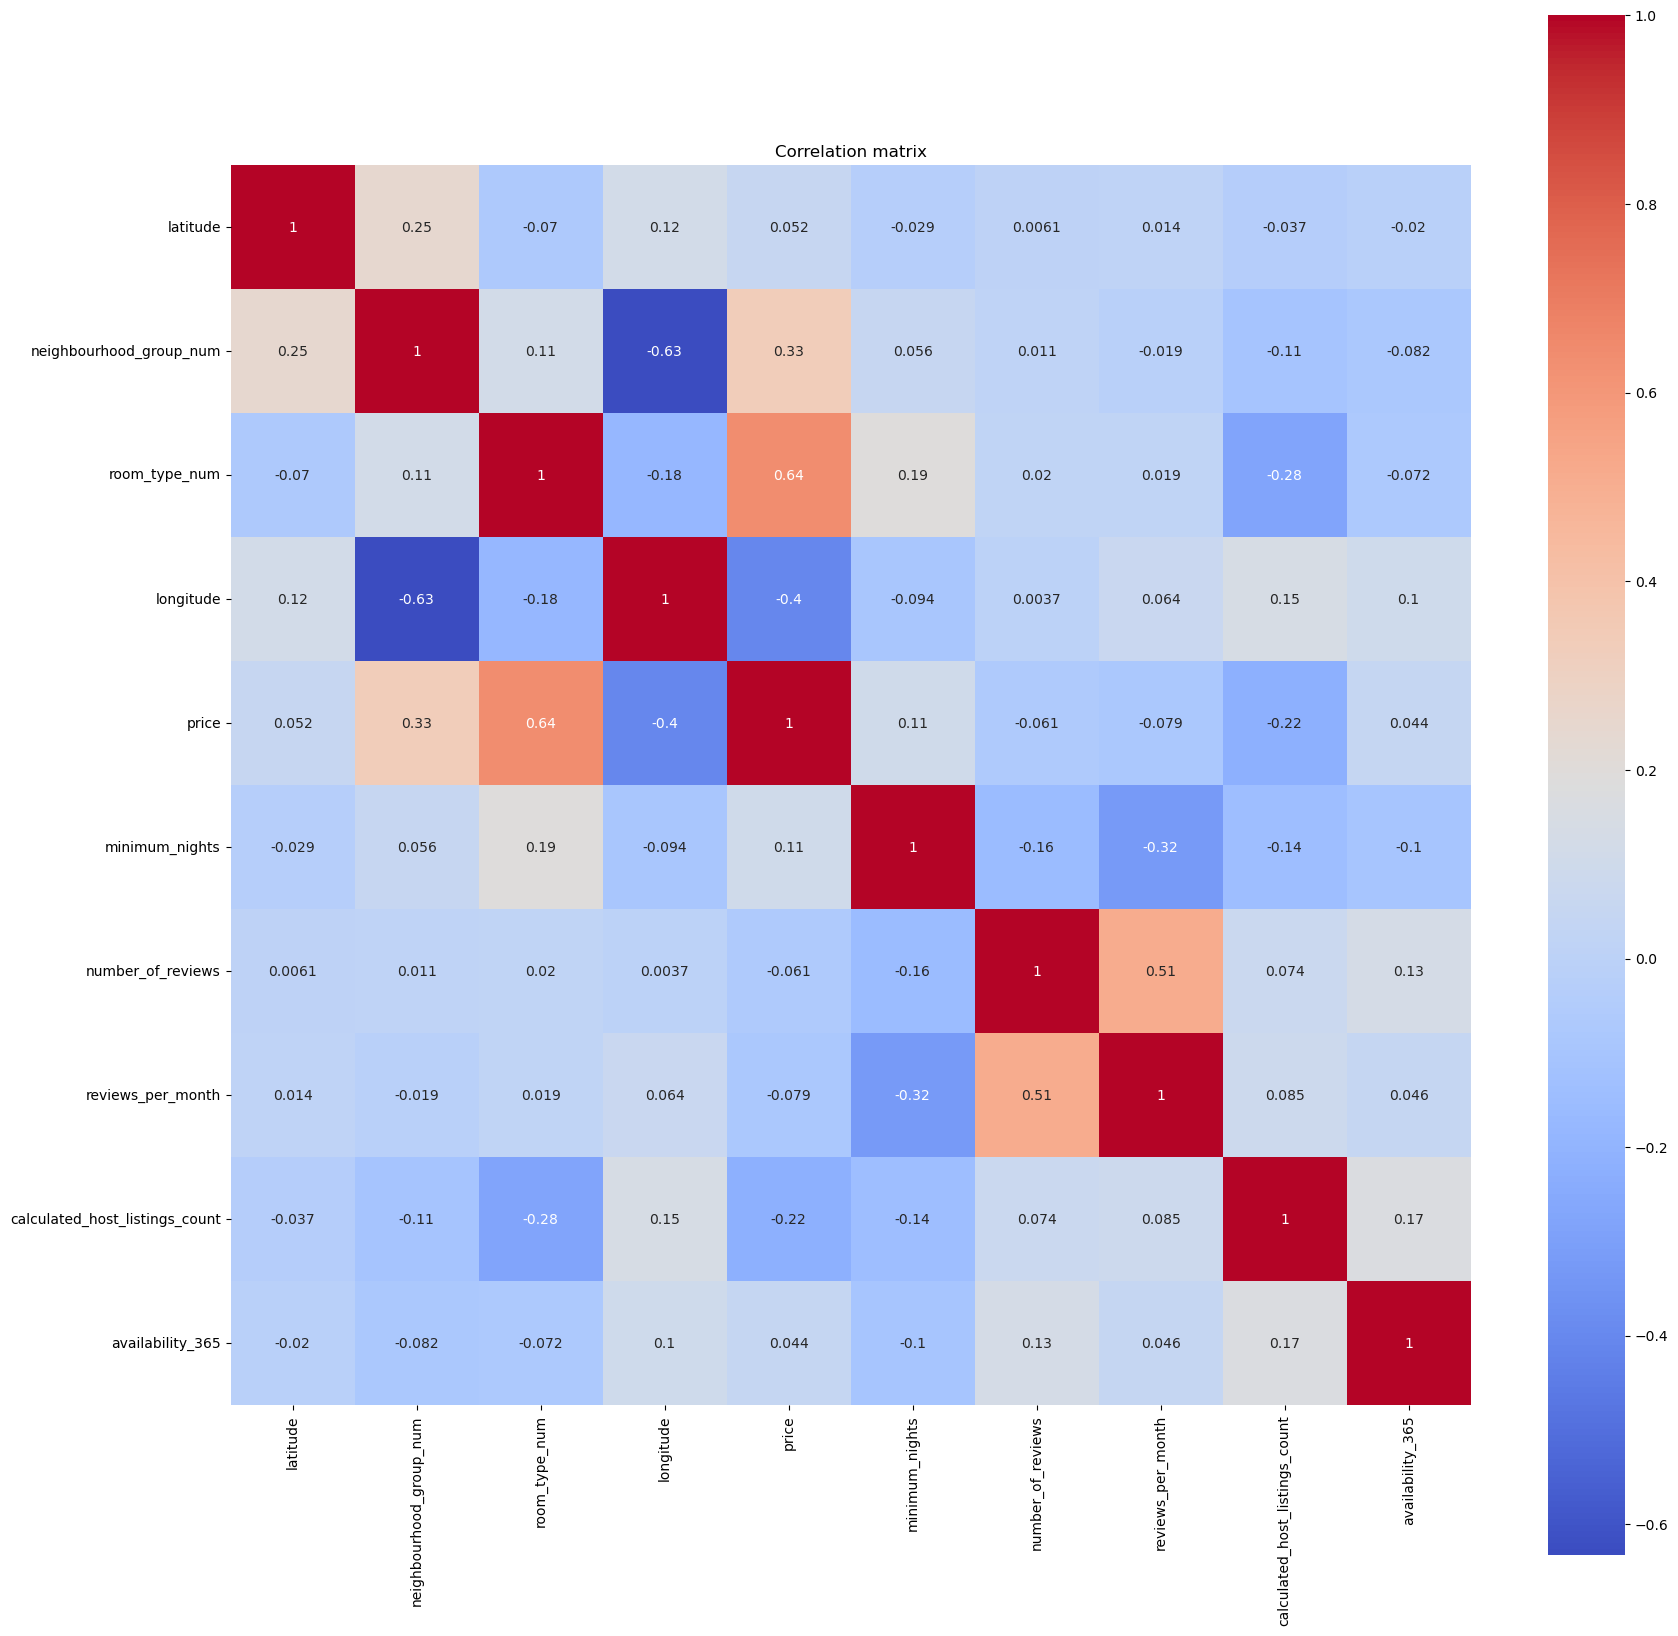

In [113]:
# Resolver acá'
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
airbnb_var = airbnb_clean[['latitude', 'neighbourhood_group_num', 'room_type_num' ,'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
correlation = airbnb_var.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap=custom_palette)
plt.title('Correlation matrix')
plt.savefig('correlation_matrix.png', format='png', dpi=300, bbox_inches='tight')

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

neighbourhood_group
Bronx            0.023708
Brooklyn         0.458072
Manhattan        0.418911
Queens           0.099262
Staten Island    0.000046
Name: offer_group, dtype: float64


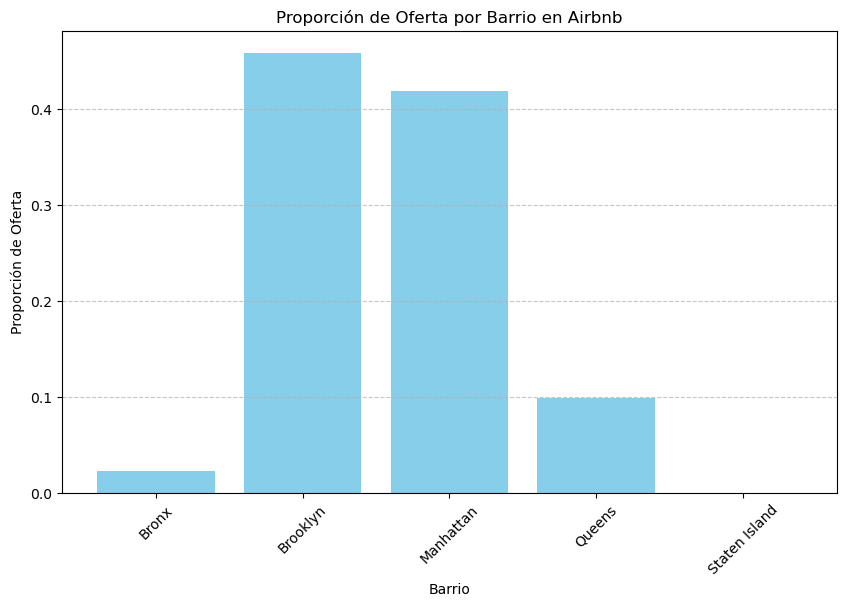

In [117]:
# Resolver acá
total_oferentes = 21680  # Definimos la variable total de oferentes

# Calcular la suma de oferta por cada barrio
oferta_por_barrio = airbnb_clean.groupby('neighbourhood_group')['offer_group'].first()

# Calcular la proporción de oferta por cada barrio
proporcion_oferta = oferta_por_barrio / total_oferentes
print(proporcion_oferta)

# Crear un gráfico de barras con la proporción de oferta por barrio
plt.figure(figsize=(10, 6))
plt.bar(proporcion_oferta.index, proporcion_oferta.values, color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Barrio en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('proporcion_oferta_barrio.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

         room_type  offer_room
0  Entire home/apt       11260
1     Private room        9953
2      Shared room         467
room_type
Entire home/apt    0.519373
Private room       0.459087
Shared room        0.021541
Name: offer_room, dtype: float64


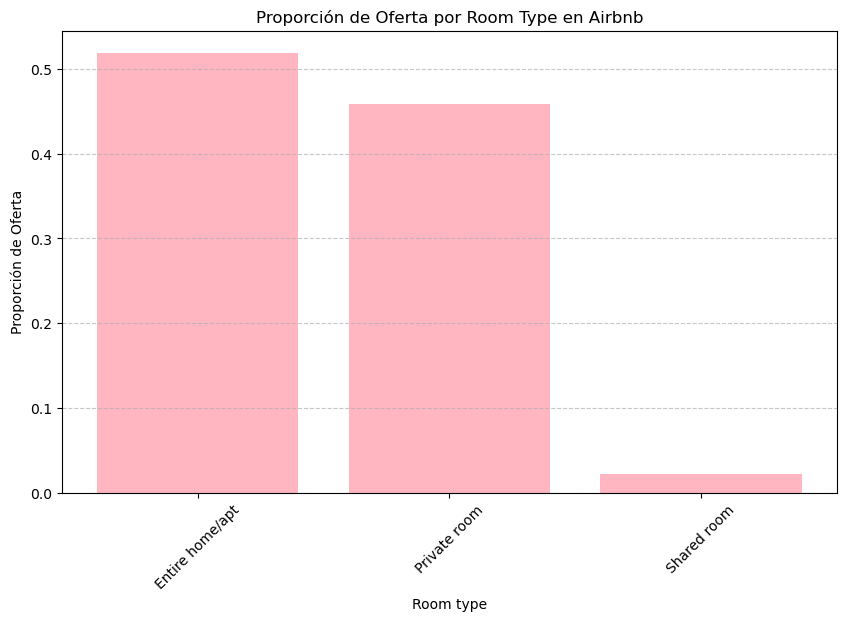

In [119]:
#agrupar por 'room_type' y contar la cantidad de oferentes por cada grupo
offer_per_room = airbnb_clean.groupby('room_type').size().reset_index(name='offer_room')

# Mergeamos 'offer_room' con airbnb_clean
airbnb_clean = airbnb_clean.merge(offer_per_room, on='room_type', how='left')
print(offer_per_room)
airbnb_clean

# Calculamos el total de oferta de los room type
oferta_por_roomtype = airbnb_clean.groupby('room_type')['offer_room'].first()

# Calculamos la proporcion de oferta por room type
proporcion_por_roomtype = oferta_por_roomtype / total_oferentes
print(proporcion_por_roomtype)

# Creamos histograma
plt.figure(figsize=(10, 6))
plt.bar(proporcion_por_roomtype.index, proporcion_por_roomtype.values, color='lightpink')
plt.xlabel('Room type')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Room Type en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('proporcion_oferta_hab.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

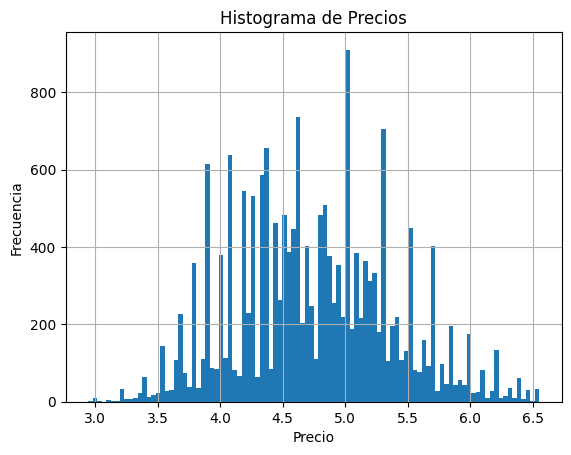

In [96]:
# Resolver acá
airbnb_clean['price'].hist(bins=100)  # Puedes ajustar el número de bins si lo prefieres

# Mostrar el histograma
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

In [97]:
precios = airbnb_clean['price']
print('El precio máximo es:', max(precios))
print('El precio mínimo es: ', min(precios))
print('El precio promedio es: ', np.mean(precios)) 

El precio máximo es: 6.551080335043404
El precio mínimo es:  2.9444389791664403
El precio promedio es:  4.746639350471186


In [98]:
#Media de precio por neigbourhood_group
precios_agrupados = airbnb_clean.groupby('room_type')['price'].agg(['mean'])
print(precios_agrupados)

precios_barrio = airbnb_clean.groupby('neighbourhood_group')['price'].agg(['mean'])
print(precios_barrio)

                     mean
room_type                
Entire home/apt  5.146272
Private room     4.321331
Shared room      3.974792
                         mean
neighbourhood_group          
Bronx                4.170259
Brooklyn             4.640457
Manhattan            4.977619
Queens               4.411445


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

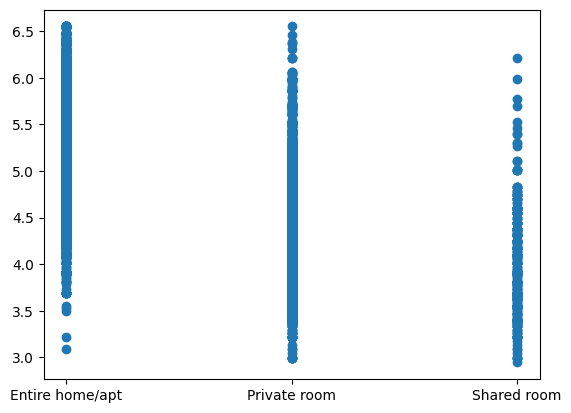

In [99]:
# Resolver acá

plt.scatter(airbnb_clean['room_type'],airbnb_clean['price'])

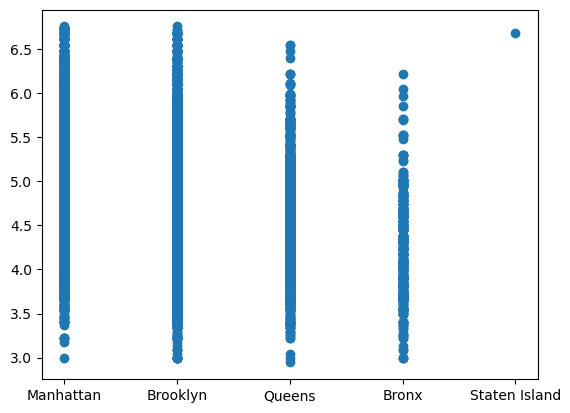

In [125]:
plt.scatter(airbnb_clean['neighbourhood_group'],airbnb_clean['price'])

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [141]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


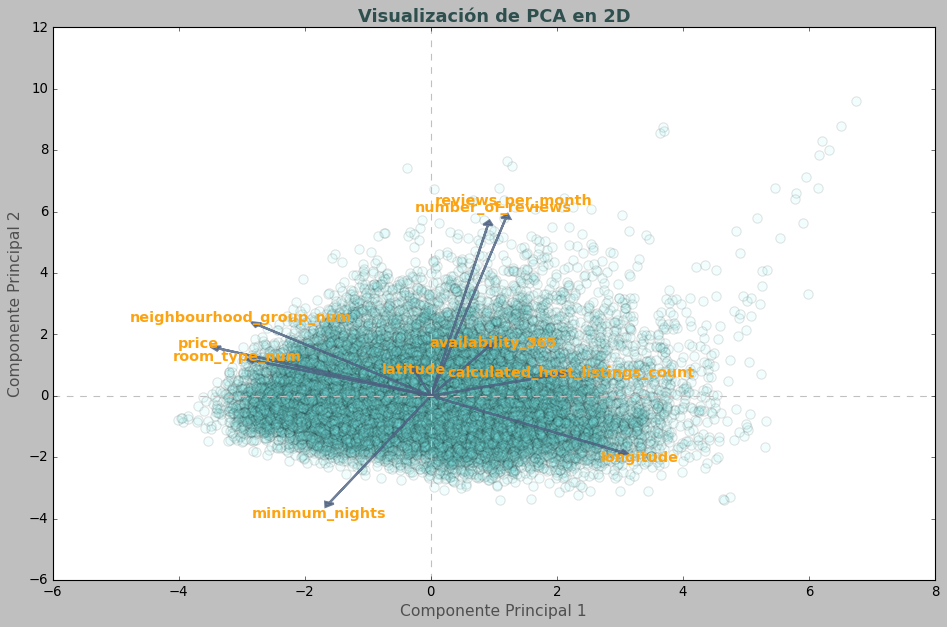

In [159]:
# Resolver acá
# Inicializamos el transformador 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform
airbnb_transformed = pd.DataFrame(scaler.fit_transform(airbnb_var), columns=airbnb_var.columns)

#calculo pca
pca = PCA()
airbnb_pca = pca.fit_transform(airbnb_transformed) 

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=airbnb_pca, columns=[f'PC{i+1}' for i in range(airbnb_pca.shape[1])])

# Estilo clásico para el gráfico
plt.style.use('classic')

# Definición de paleta de colores 
color_points = '#80EFED'
color_arrows = '#4D6080'
color_text = '#FCA311'

# Crear el gráfico 2D para los dos primeros componentes principales
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color=color_points, edgecolor='k', s=70, alpha=0.1)
plt.xlabel('Componente Principal 1', fontsize=14, color='#4F4F4F')
plt.ylabel('Componente Principal 2', fontsize=14, color='#4F4F4F')
plt.title('Visualización de PCA en 2D', fontsize=16, fontweight='bold', color='#2F4F4F')
plt.axhline(0, color='#C0C0C0', linestyle='--', linewidth=1)
plt.axvline(0, color='#C0C0C0', linestyle='--', linewidth=1)

# Calcular las cargas (loadings) y añadir flechas de vectores
loadings = pca.components_  # Vectores de carga
num_variables = len(airbnb_var.columns)  # Número de variables originales

for i in range(num_variables):
    plt.arrow(0, 0,  # Flecha comienza en (0, 0)
              loadings[0, i] * max(pca_df['PC1']),  # Coordenada x del extremo de la flecha
              loadings[1, i] * max(pca_df['PC2']),  # Coordenada y del extremo de la flecha
              color=color_arrows, alpha=0.8, head_width=0.15, head_length=0.15, linewidth=2)
    
    # Añadir el nombre de cada variable como etiqueta
    plt.text(loadings[0, i] * max(pca_df['PC1']) * 1.1,  # Posición x del texto
             loadings[1, i] * max(pca_df['PC2']) * 1.1,  # Posición y del texto
             airbnb_var.columns[i], color=color_text, ha='center', va='center', fontsize=13, fontweight='bold')

plt.grid(False)  # Eliminar cuadrícula
plt.gca().set_facecolor('#FFFFFF') 

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('PCA.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [161]:
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)
# Loadings vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1


Varianza explicada: [0.23887477 0.16701334 0.12662185 0.10748699 0.10307238 0.08319467
 0.07476177 0.04406239 0.03025605 0.0246558 ]
Loadings:
 [[-3.50941406e-02 -4.05434760e-01 -4.14860885e-01  4.46883925e-01
  -4.98194047e-01 -2.38383456e-01  1.34433252e-01  1.76414265e-01
   3.00681302e-01  1.33972915e-01]
 [ 7.94359666e-02  2.39515593e-01  1.18887712e-01 -1.90207416e-01
   1.60098889e-01 -3.62539247e-01  5.79063922e-01  6.01401902e-01
   7.22030527e-02  1.63493564e-01]
 [ 4.38562245e-01  5.32898247e-01 -5.23018901e-01 -2.96407822e-01
  -2.26810903e-01 -1.24987395e-01 -1.40888892e-01 -1.31880381e-01
   2.08086055e-01 -1.21116849e-01]
 [ 5.08411903e-01 -7.53324496e-02  8.56193595e-02  3.12215292e-01
  -1.18134814e-01  1.29881777e-02  9.33281734e-02  2.08828372e-01
  -4.80385598e-01 -5.77770723e-01]
 [-6.37666125e-01  2.81657599e-02 -1.47401616e-01 -3.38079819e-01
  -2.81025755e-01 -5.21903956e-04  9.51635113e-02  1.45635508e-01
  -7.06971920e-02 -5.85084410e-01]
 [ 8.54607468e-02  8.

-0.03509414059804826

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [112]:
# Resolver acá
from sklearn.model_selection import train_test_split
airbnb_var = airbnb_var.dropna()
# Definimos variables
X = airbnb_var.drop(columns=['price'])  # Todas las variables menos 'price'
y = airbnb_var['price']  # Variable dependiente

# Agregamos la columna de unos
X['ones'] = 1

# Dividimos el dataset en 70% entrenamiento y 30% prueba con semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=201)

# Mostrar las dimensiones de los conjuntos para verificar
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")
print(f"Vector de entrenamiento (y_train): {y_train.shape}")
print(f"Vector de prueba (y_test): {y_test.shape}")

Conjunto de entrenamiento (X_train): (12887, 10)
Conjunto de prueba (X_test): (5523, 10)
Vector de entrenamiento (y_train): (12887,)
Vector de prueba (y_test): (5523,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [117]:
# Resolver acá
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Hacemos modelo lienal
model = LinearRegression()

# Entrenamos al modelo
model.fit(X_train, y_train)

# Hacemos las predicciones con los datos entrenamiento
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluamos el modelo con R^2 y MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print("Evaluación en el conjunto de entrenamiento:")
print(f"R² (train): {r2_train}")
print(f"Error medio cuadrado (MSE, train): {mse_train}")
print("\nEvaluación en el conjunto de prueba:")
print(f"R² (test): {r2_test}")
print(f"Error medio cuadrado (MSE, test): {mse_test}")

# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': model.coef_})
print("\nCoeficientes del modelo de regresión lineal:")
print(coeficientes)

Evaluación en el conjunto de entrenamiento:
R² (train): 0.5678012898304869
Error medio cuadrado (MSE, train): 0.16865256923469255

Evaluación en el conjunto de prueba:
R² (test): 0.5607108875496583
Error medio cuadrado (MSE, test): 0.17363193088511558

Coeficientes del modelo de regresión lineal:
                         Variable  Coeficiente
0                        latitude     1.516400
1         neighbourhood_group_num     0.034016
2                   room_type_num     0.733188
3                       longitude    -5.543148
4                  minimum_nights    -0.035439
5               number_of_reviews    -0.033742
6               reviews_per_month    -0.012320
7  calculated_host_listings_count    -0.033947
8                availability_365     0.066124
9                            ones     0.000000


## Análisis de los resultados

R2 explica que más de la mitad de la variabilidad de los datos es explicada con el modelo y que, como el MSE dio bajo, significa que hay poca diferencia entre los datos predichos y los reales. Esto sucedió tanto con los datos de training como con los de evaluación, dando a entender que este es un buen modelo de predicción.

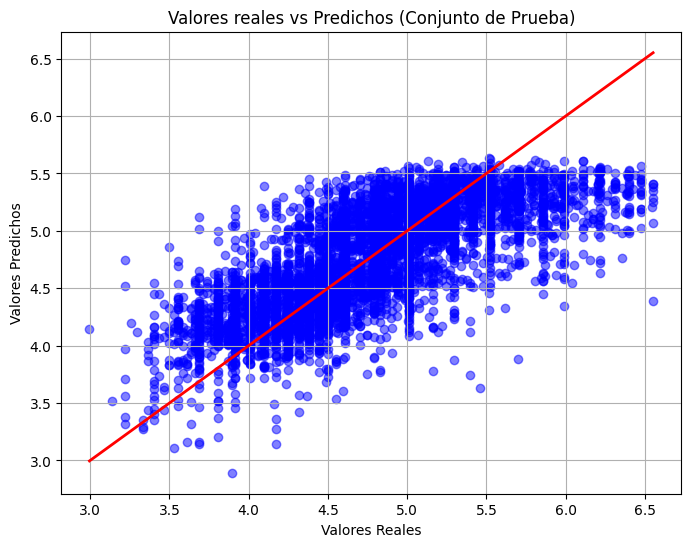

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Línea 45 grados
plt.title('Valores reales vs Predichos (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()